# Outliers and Impact on Machine Learning

#### Which Machine Learning Models are sensitive (get impacted) to outliers?
1. Naive Bayes Classifier --- Not Sensitive to Outliers
2. SVM --- Not Sensitive to Outliers
3. Decision Tree Regressor/Classifier --- Not Sensitive to Outliers
4. Ensemble Techniques --- Not Sensitive to Outliers
5. KNN --- Not Sensitive to Outliers

6. Linear Regression --- Sensitive
7. Logistic Regression --- Sensitive
8. Neural Networks --- Sensitive
9. K Means --- Sensitive
10. Heirarchial --- Sensitive
11. PCA --- Sensitive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Age.isnull().sum()

177

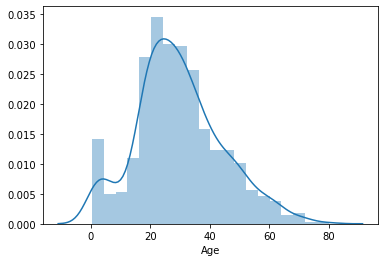

In [4]:
sns.distplot(df.Age.dropna())

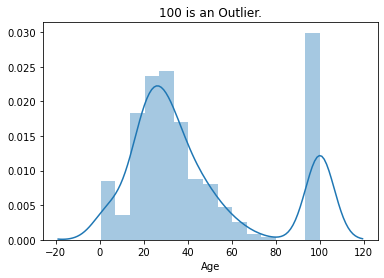

In [5]:
sns.distplot(df.Age.fillna(100))
plt.title('100 is an Outlier.');

Here we have created an outlier by filling all na values by 100, therefore creating an outlier.

## Guassian Distribution :

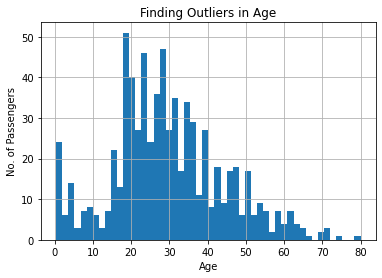

In [6]:
fig = df['Age'].hist(bins=50)
fig.set_title('Finding Outliers in Age')
fig.set_xlabel('Age')
fig.set_ylabel('No. of Passengers');

##### Here we will use three standard deviation method to find out the outliers.

The dotted points in this plot are the outliers


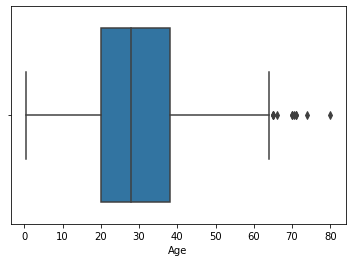

In [7]:
sns.boxplot('Age', data=df);
print("The dotted points in this plot are the outliers")

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Assuming Age follows a Guassian Distribution, we will calculate the boundaries which differentiates the outliers.

In [9]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()

In [10]:
# Use this method of finding outliers when dealing with Normally distributed Data
upper_boundary = age_mean + (3 * age_std)
lower_boundary = age_mean - (3 * age_std)

In [11]:
print(f"The upper and lower boundaries are : {lower_boundary} and {upper_boundary}")

The upper and lower boundaries are : -13.88037434994331 and 73.27860964406095


##### Lets compute the Interquantile Range to calculate the boundaries
Interquantile Range is the difference between 75 percentile and 25 percentile

In [12]:
IQR = df['Age'].quantile(q=0.75) - df['Age'].quantile(q=0.25)

In [13]:
IQR

17.875

In [14]:
lower_bridge = df['Age'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR * 1.5)
print(f"Lower and Upper bridges are: {lower_bridge} and {upper_bridge}")

Lower and Upper bridges are: -6.6875 and 64.8125


In [15]:
# To find the Extreme Outliers Boundaries:

extreme_lower_bridge = df['Age'].quantile(0.25) - (IQR * 3)
extreme_upper_bridge = df['Age'].quantile(0.75) + (IQR * 3)
print(f"Lower and Upper bridges are: {extreme_lower_bridge} and {extreme_upper_bridge}")

Lower and Upper bridges are: -33.5 and 91.625


## Skewed Distribution:

Text(0, 0.5, 'No. of Passengers')

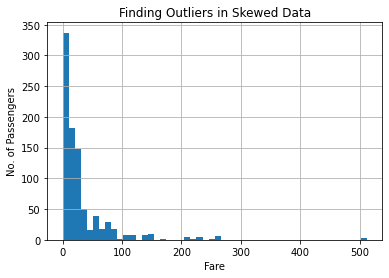

In [16]:
fig = df['Fare'].hist(bins=50)
fig.set_title('Finding Outliers in Skewed Data')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of Passengers')

All the dotted points are Outliers


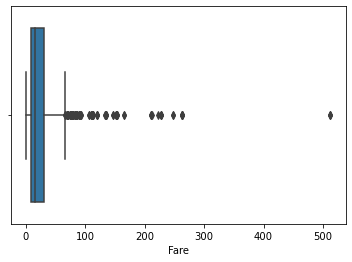

In [17]:
sns.boxplot('Fare', data=df)
print('All the dotted points are Outliers')

In [18]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
# Calculatig IQR of Fare 
iqr_fare = df['Fare'].quantile(q=0.75) - df['Fare'].quantile(q=0.25)

In [20]:
iqr_fare

23.0896

In [21]:
lower_bridge = df['Fare'].quantile(0.25) - (iqr_fare * 1.5)
upper_bridge = df['Fare'].quantile(0.75) + (iqr_fare * 1.5)

print(f"{lower_bridge} and {upper_bridge}")

-26.724 and 65.6344


In [22]:
# For positively or right skewed data as we have here, we should use Extreme Bridge 
extreme_lower_bridge = df.Fare.quantile(0.25) - (iqr_fare * 3)
extreme_upper_bridge = df.Fare.quantile(0.75) + (iqr_fare * 3)

print(f"{extreme_lower_bridge} and {extreme_upper_bridge}")

-61.358399999999996 and 100.2688


##### Note - In both above examples,for age and fare we are not going to take in to count the negative boundaries as both age and fare cannot be negative.

### In conclusion

- For Gaussian Distribution, we will use the 3 standard deviation method and take the boundaries accordingly.

- For Skewed Distribution, we will first calculate the IQR and then we will use the IQR to calculate the lower and upper boundary and use them in accordance with our domain. (For extreme boundaries we will multiply IQR by 3 and for normal 1.5)

In [23]:
# For Age our upper boundary was 73
age_mean = df['Age'].mean()
age_std = df['Age'].std()

boundary = age_mean + (age_std * 3)

In [24]:
data = df.copy()

In [25]:
data.loc[data['Age'] > boundary, "Age"] = boundary

In [26]:
iqr_fare = df['Fare'].quantile(q=0.75) - df['Fare'].quantile(q=0.25)

upper_bridge = df['Fare'].quantile(0.75) + (iqr_fare * 3)
upper_bridge

100.2688

In [27]:
data.loc[data['Fare'] >= upper_bridge, 'Fare'] = upper_bridge

##### Now checking for outliers 

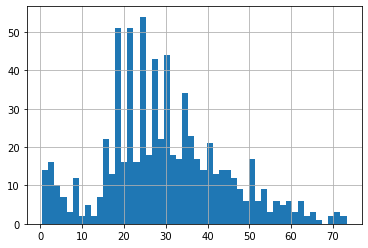

In [28]:
fig = data['Age'].hist(bins=50);

Before there were some values greater than 100, ranging upto 500


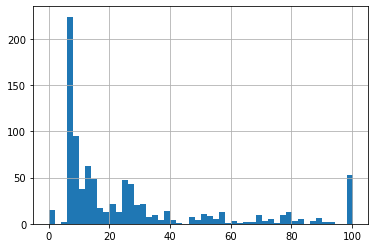

In [29]:
fig = data['Fare'].hist(bins=50)
print("Before there were some values greater than 100, ranging upto 500")

In [35]:
# Creating our Model after handling outliers
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size=0.3,
                                                   random_state=0)

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

logclf = LogisticRegression()
logclf.fit(X_train, y_train)

y_pred = logclf.predict(X_test)
y_proba = logclf.predict_proba(X_test)

print(f"ROC score = {roc_auc_score(y_test, y_proba[:, 1])}")
print(f"Accuracy score = {accuracy_score(y_test, y_pred)}")

ROC score = 0.7149404761904762
Accuracy score = 0.7052238805970149


In [40]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)
y_proba = rfclf.predict_proba(X_test)

print(f"ROC score = {roc_auc_score(y_test, y_proba[:, 1])}")
print(f"Accuracy score = {accuracy_score(y_test, y_pred)}")

ROC score = 0.7200892857142858
Accuracy score = 0.7164179104477612
